# Tensors

## Scalars (rank-0 tensors)

In [2]:
import numpy as np

x = np.array(12)
print(x)
print(x.ndim)

12
0


## Vectors (rank-1 tensors)

In [3]:
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)

[12  3  6 14]
1


## Matrices (rank-2 tensors)

In [5]:
x = np.array([ [12, 3, 6, 14], 
                [1, 2, 3, 4], 
                [5, 6, 7, 8] ])
print(x)
print(x.ndim)
print(x.shape)

[[12  3  6 14]
 [ 1  2  3  4]
 [ 5  6  7  8]]
2
(3, 4)


## Rank-3 and higher-rank tensors

In [6]:
x = np.array(
    [ [ [12, 3, 6, 14], 
        [1, 2, 3, 4], 
        [5, 6, 7, 8] ],
      [ [9, 8, 7, 6], 
        [5, 4, 3, 2], 
        [1, 0, -1, -2] ]
    ])
print(x)
print(x.ndim)
print(x.shape)

[[[12  3  6 14]
  [ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9  8  7  6]
  [ 5  4  3  2]
  [ 1  0 -1 -2]]]
3
(2, 3, 4)


# MNIST in Keras

In [9]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.ndim)
print(x_train.shape)
print(x_test.ndim)
print(x_test.shape)

print(y_train.ndim)
print(y_train.shape)
print(y_test.ndim)
print(y_test.shape)


11490434/11490434 [==============================] - 1s 0us/step
3
(60000, 28, 28)
3
(10000, 28, 28)
1
(60000,)
1
(10000,)


(28, 28)


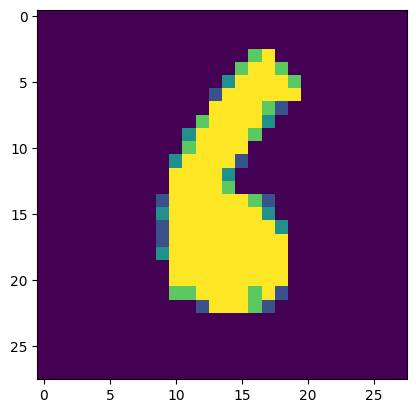

In [14]:
import matplotlib.pyplot as plt

SAMPLE_INDEX = 2025

digit = x_train[SAMPLE_INDEX]
print(digit.shape)
plt.imshow(digit)
plt.show()

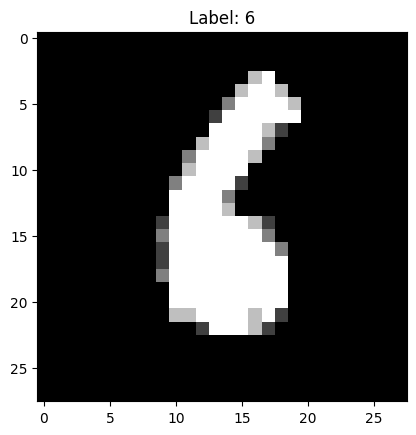

In [15]:
plt.imshow(digit, cmap=plt.cm.binary_r)
plt.title(f"Label: {y_train[SAMPLE_INDEX]}")
plt.show()

# MNIST in Keras

In [1]:
MNIST_MODEL_FILE = 'mnist_model_two_layers.h5'


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2025-11-10 20:22:59.839563: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-10 20:22:59.841288: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 20:22:59.873445: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 20:22:59.874006: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-10 20:23:00.448026: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

if os.path.exists(MNIST_MODEL_FILE):
    model = keras.models.load_model(MNIST_MODEL_FILE)
else:
    print(f'{MNIST_MODEL_FILE} not found, training model from scratch.')
    model.fit(x_train, y_train, epochs=10, batch_size=32)
    model.save(MNIST_MODEL_FILE)

model.evaluate(x_test, y_test)




mnist_model_two_layers.h5 not found, training model from scratch.
Epoch 1/10


2025-11-10 20:23:03.942163: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1875/1875 [==============================] - 7s 4ms/step - loss: 1.4189 - accuracy: 0.7824
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3505 - accuracy: 0.9076
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2291 - accuracy: 0.9380
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1752 - accuracy: 0.9519
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1463 - accuracy: 0.9596
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1244 - accuracy: 0.9661
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1199 - accuracy: 0.9696
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1009 - accuracy: 0.9723
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0940 - accuracy: 0.9751
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1601 - accuracy:

[0.16007807850837708, 0.96670001745224]

313/313 [==============================] - 1s 2ms/step
3 with 99.86205101013184 % confidence


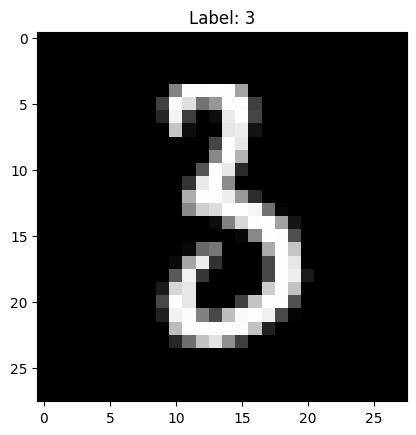

In [4]:
predictions = model.predict(x_test)
SAMPLE_INDEX = 2025

# single prediction
print(f'{np.argmax(predictions[SAMPLE_INDEX])} with {100 * np.max(predictions[SAMPLE_INDEX])} % confidence')
plt.imshow(x_test[SAMPLE_INDEX], cmap=plt.cm.binary_r)
plt.title(f"Label: {y_test[SAMPLE_INDEX]}")
plt.show()

In [25]:
predictions.shape

(10000, 10)

In [5]:
wrong_predictions = []
for i, prediction in enumerate(predictions):
    if np.argmax(prediction) != y_test[i]:
        wrong_predictions.append(i)

In [6]:
print(f'Wrong predictions: {len(wrong_predictions)} out of {len(y_test)}')

Wrong predictions: 333 out of 10000


Index: 217, Predicted: 5, Actual: 6


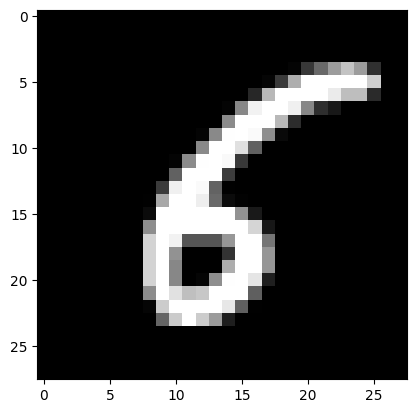

Index: 233, Predicted: 7, Actual: 8


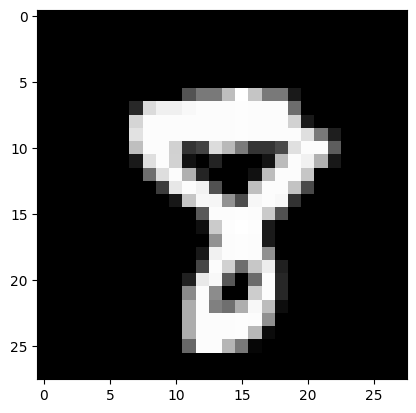

Index: 247, Predicted: 6, Actual: 4


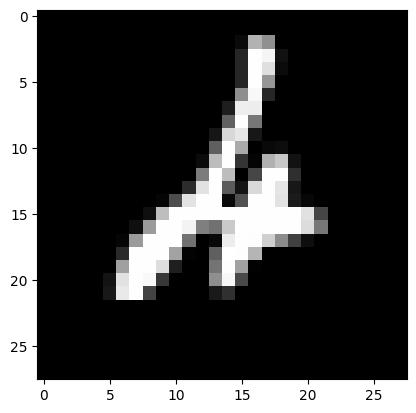

Index: 259, Predicted: 0, Actual: 6


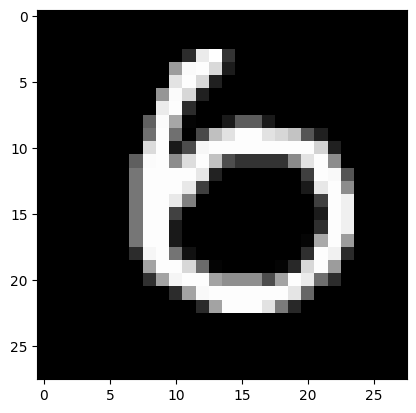

Index: 320, Predicted: 1, Actual: 9


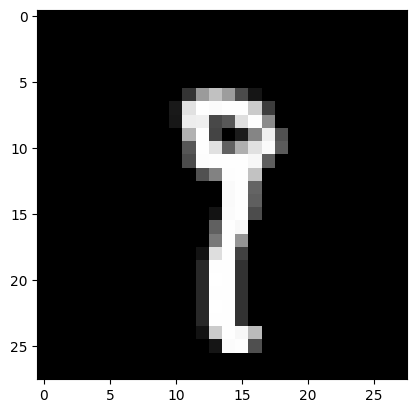

In [7]:
for wrong_index in wrong_predictions[:5]:
    print(f'Index: {wrong_index}, Predicted: {np.argmax(predictions[wrong_index])}, Actual: {y_test[wrong_index]}')
    plt.imshow(x_test[wrong_index], cmap=plt.cm.binary_r)
    plt.show()